In [1]:
%load_ext autoreload
%autoreload 2

## Exploratory data analysis

In [19]:
import os
while 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np
import pandas as pd 
from src.path_reader import BASE_PATH_TRAIN
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
os.listdir(BASE_PATH_TRAIN)

['ArgentinaBelgium72.csv',
 'AustraliaSpain34.csv',
 'CameroonBrazil36.csv',
 'USASlovenia2010.csv',
 'GermanyAlgeria67.csv',
 'GermanyBrazil74.csv',
 'MexicoCroatia37.csv',
 'HondurasSwitzerland54.csv',
 'ArgentinaGermanyFinal77.csv',
 'AustraliaNetherlands29.csv',
 'NetherlandsChile35.csv',
 'GermanyUSA57.csv',
 'FranceGermany70.csv',
 'FranceNigeria66.csv',
 'BelgiumSouthKorea59.csv',
 'PortugalGhana58.csv']

In [6]:
len(os.listdir(BASE_PATH_TRAIN))

16

In [9]:
all_dfs = []
for file in tqdm(os.listdir(BASE_PATH_TRAIN)):
    file_path = os.path.join(BASE_PATH_TRAIN, file)
    all_dfs.append(pd.read_csv(file_path))

100%|██████████| 16/16 [00:09<00:00,  1.68it/s]


In [12]:
train_df = pd.concat(all_dfs)
train_df

,ID,MatchID,PeriodID,EventType,Timestamp,Tweet
0,11_0,11,0,0,1404575400000,RT @2014WorIdCup: Argentina vs Belgium\n\nWho ...
1,11_0,11,0,0,1404575400000,@elijahman_ time to focus on Belgium winning t...
2,11_0,11,0,0,1404575400000,RT @FIFAWorldCup: GLOBAL STADIUM: #Joinin with...
3,11_0,11,0,0,1404575400000,RT @CatholicNewsSvc: #PopeFrancis. Uh-oh. Arge...
4,11_0,11,0,0,1404575400000,RT @soccerdotcom: If he scores vs #BEL we'll a...
...,...,...,...,...,...,...
272384,3_129,3,129,1,1403805600000,RT @RealEsparta: #POR 2-1 #GHA: Cristiano Rona...
272385,3_129,3,129,1,1403805600000,RT @NBCSports: USA MOVES ON! Germany beats #US...
272386,3_129,3,129,1,1403805600000,RT @xTrustAndObey: Folks don't rate Ghana. smh...
272387,3_129,3,129,1,1403805600000,Ronaldo could have easily scored 4-5 goals ton...


#### Number of tweets in each match

In [26]:
train_df['MatchID'].unique()

array([11,  2,  8, 18,  4,  1, 19,  0, 10, 12,  7, 17,  5, 13, 14,  3])

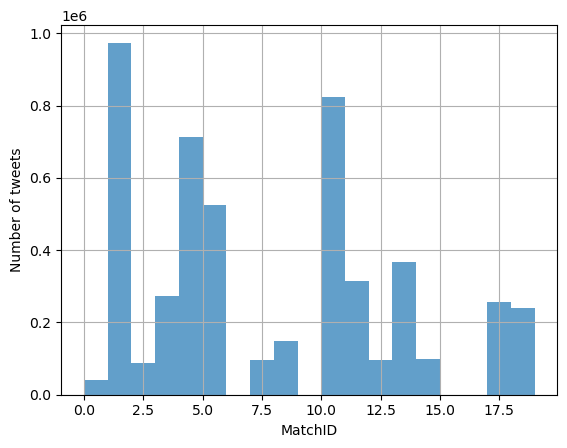

In [29]:
plt.hist(train_df['MatchID'], alpha = 0.7, bins=19)
plt.xlabel("MatchID")
plt.ylabel("Number of tweets")
plt.grid()

#### Missing values

In [32]:
train_df.isna().sum()

ID           0
MatchID      0
PeriodID     0
EventType    0
Timestamp    0
Tweet        0
dtype: int64

#### Average length of tweets

In [38]:
def get_text_len(x: pd.Series):
    return x.apply(lambda u : len(u.split(" "))).mean()



In [39]:
train_df.groupby("MatchID")\
    .Tweet\
    .apply(get_text_len)

MatchID
0     17.174727
1     12.479847
2     18.234941
3     15.102985
4     13.311508
5     13.804027
7     16.500704
8     15.328575
10    12.576063
11    13.810053
12    14.555032
13    14.142400
14    16.002349
17    15.009152
18    13.972232
19    14.412185
Name: Tweet, dtype: float64

#### Analysing column PeriodID

<Axes: xlabel='PeriodID', ylabel='Count'>

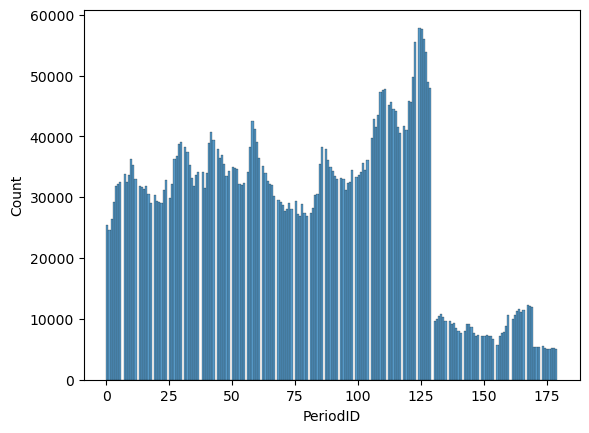

In [46]:
sns.histplot(train_df['PeriodID'])

#### Distribution of Targets

Text(0.5, 1.0, '% Of positive targets in the dataset')

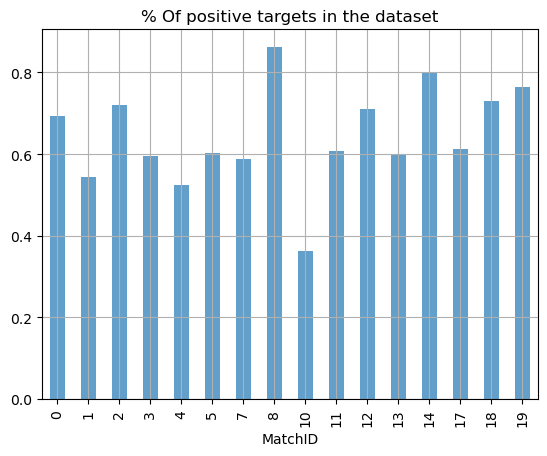

In [61]:
train_df.groupby("MatchID")\
    ['EventType']\
    .mean()\
    .plot.bar(
        alpha = 0.7,
    )

plt.grid()
plt.title("% Of positive targets in the dataset")

In [123]:
np.random.seed(1)
train_idx = sorted(np.random.choice(train_df['MatchID'].unique(), 10, replace=False))

In [126]:
list(train_idx)

[0, 2, 4, 7, 8, 11, 13, 14, 18, 19]

In [127]:
train_idx = set(train_idx)
test_idx = set(train_df['MatchID'].unique()) - train_idx

list(test_idx)

[1, 3, 5, 10, 12, 17]